In [6]:
import cv2
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

img = cv2.imread("D:\\sem1\\cvip\\proj3\\original_imgs\\point.jpg")
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Mask over the image
def mask(image, kernel):
    kernel_hig = kernel.shape[0]
    kernel_wid = kernel.shape[1]
    image_hig = image.shape[0]
    image_wid = image.shape[1]
    h = kernel_high//2
    w = kernel_widh//2
    image_conv = np.zeros(image.shape)
    for i in range(h, image_hig-h):
        for j in range(w, image_wid-w):
            total = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    total = (total + kernel[m][n] * image[i-h+m][j-w+n])
            #check for static threshold value to 
            if(total > 310):
                image_conv[i][j] = 255
    return image_conv
kernel=np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0] ])
#mask with laplacian kernel 
imgy= mask(im, kernel)
img_color = skimage.color.gray2rgb(imgy)        
img_color1 = skimage.color.gray2rgb(imgy)
font                   = cv2.FONT_HERSHEY_TRIPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 0.5
fontColor              = (255,255,0)
lineType               = 1
for n in range(imgy.shape[1]):
    for m in range(imgy.shape[0]):
        if(imgy[m][n] != 0):
            print(n,m)
            text = str(n) +" , " + str(m)
            cv2.putText(img_color1,text,(n-40, m+40),font,fontScale,fontColor,lineType)
cv2.imwrite("D:\\sem1\\cvip\\proj3\\original_imgs\\point_labelled.jpg", img_color1)
cv2.imwrite("D:\\sem1\\cvip\\proj3\\original_imgs\\point_detected.jpg", img_color)




445 249


True

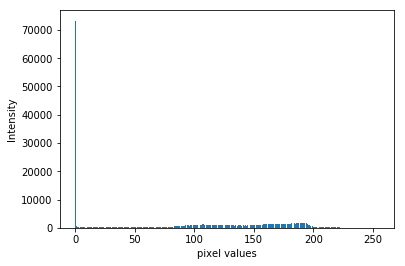

In [33]:
im = cv2.imread("D:\\sem1\\cvip\\proj3\\original_imgs\\segment.jpg")
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img_values = [0] * 256
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_values[img[i,j]]+=1
b = []
for i in range(0,256):
    b.append(i)
plt.bar(b, img_values)
plt.xlabel('pixel values')
plt.ylabel('Intensity')
fig.savefig('output/Task2B_Histogram.png')
plt.show()

In [31]:
def threshold(img):
    image_res = np.zeros([img.shape[0], img.shape[1]])
    #setting threshold by trail and error
    t = 200
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if(img[i][j] > t):
                image_res[i][j] = img[i][j]
    return image_res
seg_img = threshold(img)
cv2.imwrite( 'D:\\sem1\\cvip\\proj3\\original_imgs\\segmented.jpg',seg_img)
min_x=None
max_x=None
min_y=None
max_y=None
img_x=[]
img_y=[]
l = seg_img.shape
h = l[0]
w = l[1]
t =200
# drawing a rectangular box around max and min 
for i in range(0, h):
    for j in range(0, w):
        if (seg_img[i,j]>t):
            img_x.append(j)
            img_y.append(i)
img_x=np.array(img_x)
img_y=np.array(img_y)

min_x = np.amin(img_x)
max_x = np.amax(img_x)
min_y = np.amin(img_y)
max_y = np.amax(img_y)
print(min_x, min_y)
print(max_x, min_y)
print(max_x, max_y)
print(min_x, max_y)
seg_img[min_y:max_y, min_x] = 250
seg_img[min_y:max_y, max_x] = 250
seg_img[min_y, min_x:max_x] = 250
seg_img[max_y, min_x:max_x] = 250
cv2.imwrite( 'D:\\sem1\\cvip\\proj3\\original_imgs\\segment_box.jpg',seg_img)



138 22
425 22
425 284
138 284


True